Using device: cuda


F:\DevCache\conda\envs\main\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Epoch 1/15 [Train]: 100%|██████████| 23/23 [00:07<00:00,  3.12it/s, loss=2.88, acc=51.7]


Epoch 1/15: Train Loss: 9.6564, Train Acc: 51.67%, Val Loss: 3.9240, Val Acc: 50.98%


Epoch 2/15 [Train]: 100%|██████████| 23/23 [00:05<00:00,  4.22it/s, loss=1.07, acc=60.3]


Epoch 2/15: Train Loss: 4.1453, Train Acc: 60.31%, Val Loss: 3.1615, Val Acc: 60.78%


Epoch 3/15 [Train]: 100%|██████████| 23/23 [00:06<00:00,  3.52it/s, loss=3.38, acc=60.3] 


Epoch 3/15: Train Loss: 2.4226, Train Acc: 60.31%, Val Loss: 3.0585, Val Acc: 58.82%


Epoch 4/15 [Train]: 100%|██████████| 23/23 [00:06<00:00,  3.72it/s, loss=0.866, acc=61] 


Epoch 4/15: Train Loss: 2.0863, Train Acc: 61.00%, Val Loss: 3.1361, Val Acc: 52.94%


Epoch 5/15 [Train]: 100%|██████████| 23/23 [00:05<00:00,  3.93it/s, loss=2.27, acc=58.2] 


Epoch 5/15: Train Loss: 1.9706, Train Acc: 58.22%, Val Loss: 2.4387, Val Acc: 59.31%


Epoch 6/15 [Train]: 100%|██████████| 23/23 [00:05<00:00,  4.15it/s, loss=5.9, acc=60.4]  


Epoch 6/15: Train Loss: 1.3695, Train Acc: 60.45%, Val Loss: 3.8203, Val Acc: 50.00%


Epoch 7/15 [Train]: 100%|██████████| 23/23 [00:06<00:00,  3.75it/s, loss=0.773, acc=60.6]


Epoch 7/15: Train Loss: 1.3755, Train Acc: 60.58%, Val Loss: 1.1185, Val Acc: 66.67%


Epoch 8/15 [Train]: 100%|██████████| 23/23 [00:06<00:00,  3.48it/s, loss=0.749, acc=62.7]


Epoch 8/15: Train Loss: 1.0831, Train Acc: 62.67%, Val Loss: 1.6736, Val Acc: 55.39%


Epoch 9/15 [Train]: 100%|██████████| 23/23 [00:08<00:00,  2.67it/s, loss=1.91, acc=61.1] 


Epoch 9/15: Train Loss: 0.9781, Train Acc: 61.14%, Val Loss: 1.1254, Val Acc: 64.71%


Epoch 10/15 [Train]: 100%|██████████| 23/23 [00:08<00:00,  2.74it/s, loss=4.43, acc=63.1] 


Epoch 10/15: Train Loss: 0.9323, Train Acc: 63.09%, Val Loss: 1.8674, Val Acc: 62.75%


Epoch 11/15 [Train]: 100%|██████████| 23/23 [00:07<00:00,  3.13it/s, loss=0.548, acc=67.4]


Epoch 11/15: Train Loss: 0.8929, Train Acc: 67.41%, Val Loss: 1.1787, Val Acc: 67.65%


Epoch 12/15 [Train]: 100%|██████████| 23/23 [00:07<00:00,  3.25it/s, loss=0.597, acc=68.4]


Epoch 12/15: Train Loss: 0.8505, Train Acc: 68.38%, Val Loss: 1.0890, Val Acc: 66.18%


Epoch 13/15 [Train]: 100%|██████████| 23/23 [00:07<00:00,  3.20it/s, loss=0.954, acc=70.8]


Epoch 13/15: Train Loss: 0.8250, Train Acc: 70.75%, Val Loss: 1.0934, Val Acc: 67.16%


Epoch 14/15 [Train]: 100%|██████████| 23/23 [00:06<00:00,  3.30it/s, loss=0.805, acc=67.7]


Epoch 14/15: Train Loss: 0.7331, Train Acc: 67.69%, Val Loss: 1.0474, Val Acc: 68.63%


Epoch 15/15 [Train]: 100%|██████████| 23/23 [00:07<00:00,  3.26it/s, loss=1.14, acc=69.6] 


Epoch 15/15: Train Loss: 0.7387, Train Acc: 69.64%, Val Loss: 1.0302, Val Acc: 69.12%
Loaded best model with validation loss: 1.0302


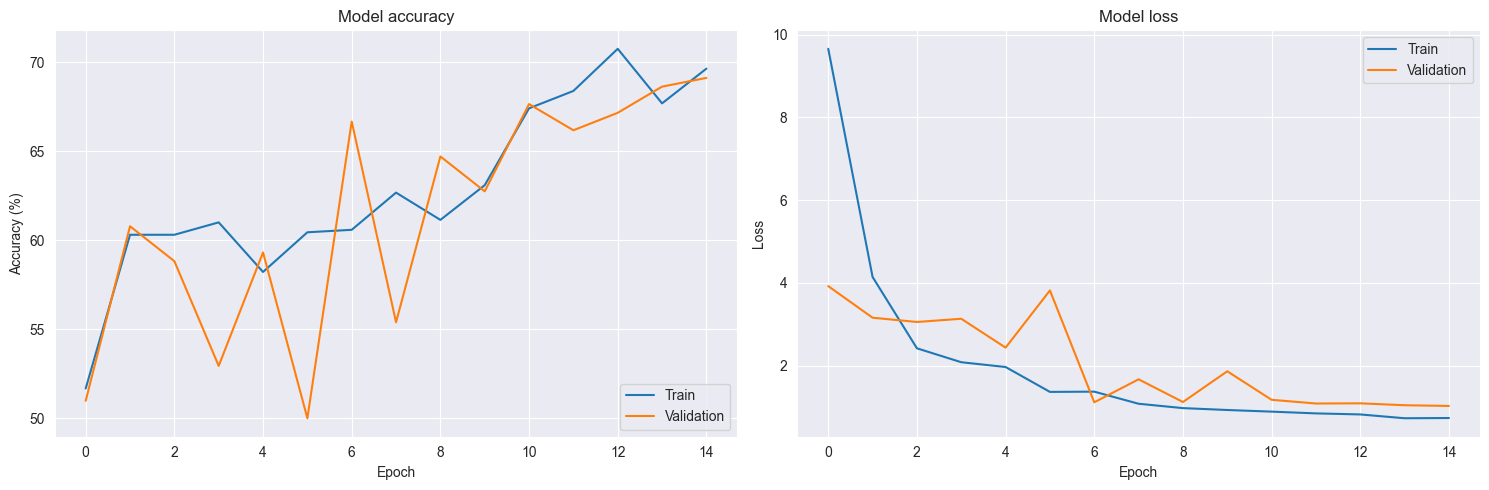

Generating predictions: 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]


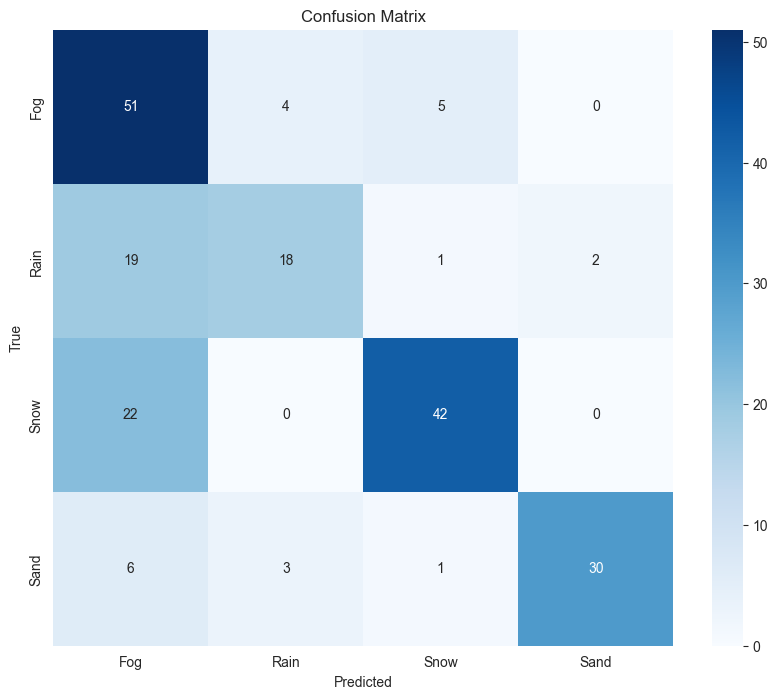


Classification Report:
              precision    recall  f1-score   support

         Fog       0.52      0.85      0.65        60
        Rain       0.72      0.45      0.55        40
        Snow       0.86      0.66      0.74        64
        Sand       0.94      0.75      0.83        40

    accuracy                           0.69       204
   macro avg       0.76      0.68      0.69       204
weighted avg       0.75      0.69      0.70       204



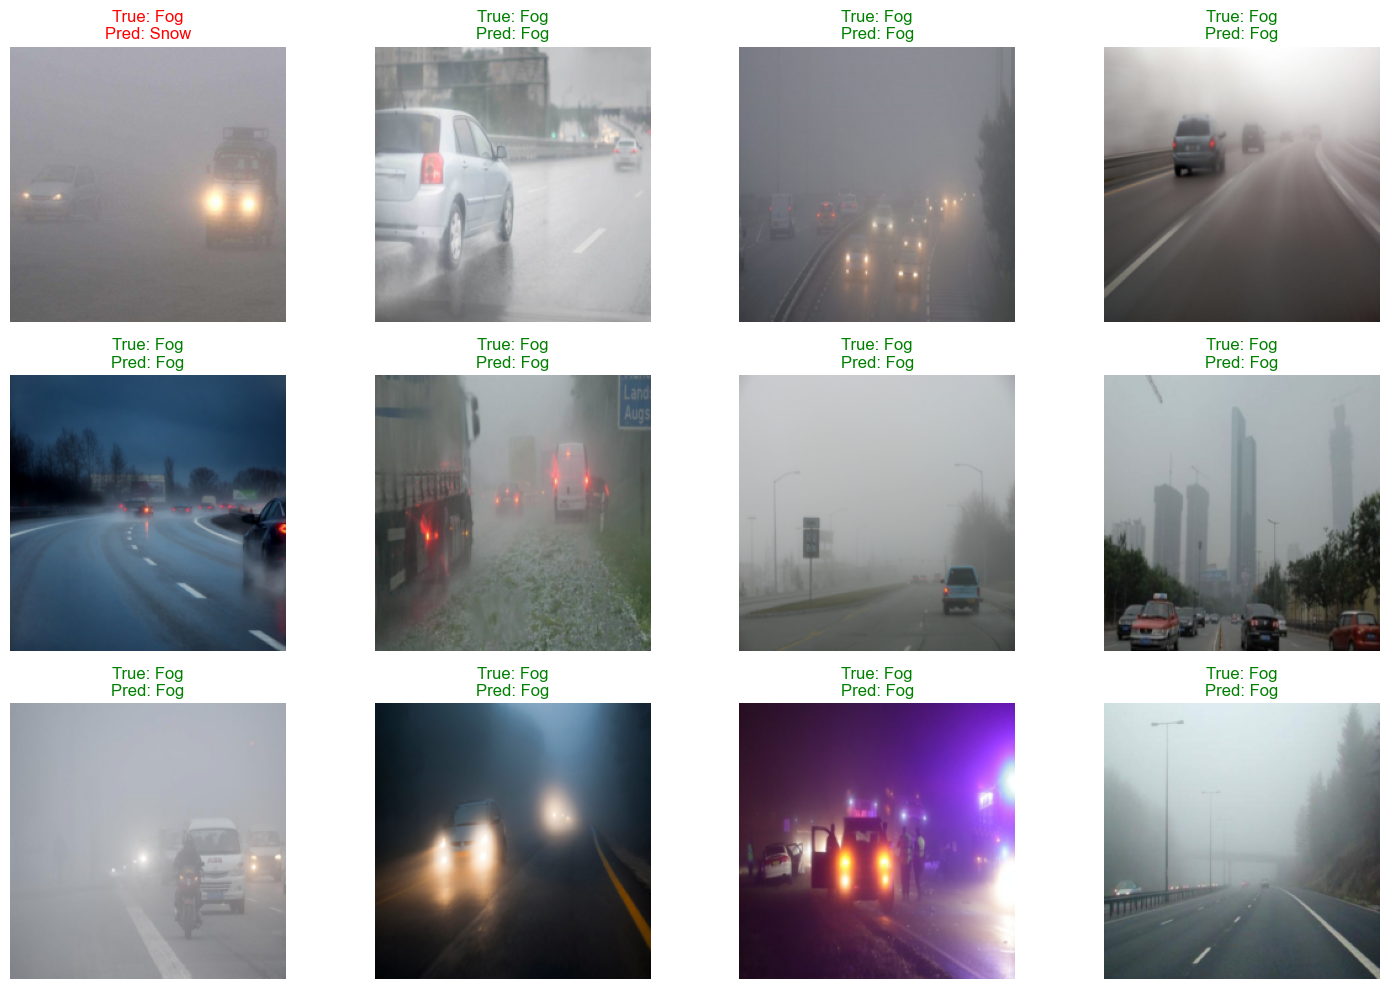

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import random
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Define paths
base_dir = '../data/DAWN_processed'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Define classes (weather conditions)
classes = ['Fog', 'Rain', 'Snow', 'Sand']

# Define parameters
img_height, img_width = 224, 224
batch_size = 32
epochs = 15
learning_rate = 0.001
weight_decay = 1e-4  # L2 regularization

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Data transformations
train_transforms = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(val_dir, transform=val_test_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=val_test_transforms)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=False)


# Define CNN model with updated dropout
class WeatherCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(WeatherCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(32),
            nn.Dropout(0.25),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(64),
            nn.Dropout(0.25),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(128),
            nn.Dropout(0.25),
        )

        final_h = img_height // 8
        final_w = img_width // 8

        self.classifier = nn.Sequential(
            nn.Linear(128 * final_h * final_w, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


# Instantiate the model
model = WeatherCNN(num_classes=len(classes))
model = model.to(device)

# Loss function and optimizer with L2 regularization
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Training and evaluation functions remain the same (from Lab 6)
# Training function

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs):
    model.train()
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
    best_val_loss = float('inf')
    best_model_state = None

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        # Training phase
        model.train()
        train_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]")
        for inputs, labels in train_bar:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Statistics
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Update progress bar
            train_bar.set_postfix({'loss': loss.item(), 'acc': 100 * correct / total})

        train_loss = running_loss / len(train_loader.dataset)
        train_acc = 100 * correct / total

        # Validation phase
        val_loss, val_acc = evaluate_model(model, val_loader, criterion)

        # Update learning rate
        scheduler.step(val_loss)

        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict().copy()

        # Print statistics
        print(f'Epoch {epoch+1}/{num_epochs}: '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

        # Update history
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)

    # Load best model
    if best_model_state:
        model.load_state_dict(best_model_state)
        print(f"Loaded best model with validation loss: {best_val_loss:.4f}")

    return model, history

# Evaluation function
def evaluate_model(model, data_loader, criterion=None):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)

            if criterion:
                loss = criterion(outputs, labels)
                running_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = running_loss / len(data_loader.dataset) if criterion else 0
    acc = 100 * correct / total

    return avg_loss, acc

# Plot function
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot accuracy
    ax1.plot(history['train_acc'])
    ax1.plot(history['val_acc'])
    ax1.set_title('Model accuracy')
    ax1.set_ylabel('Accuracy (%)')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='lower right')

    # Plot loss
    ax2.plot(history['train_loss'])
    ax2.plot(history['val_loss'])
    ax2.set_title('Model loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()

# Confusion matrix function
def plot_confusion_matrix(model, data_loader, classes):
    y_true = []
    y_pred = []

    model.eval()
    with torch.no_grad():
        for inputs, labels in tqdm(data_loader, desc="Generating predictions"):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes,
                yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.savefig('confusion_matrix.png')
    plt.show()

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=classes))

    return y_true, y_pred

# Visualize predictions function
def visualize_predictions(model, data_loader, classes, num_images=12):
    model.eval()

    # Get a batch of images
    dataiter = iter(data_loader)
    images, labels = next(dataiter)
    images, labels = images[:num_images], labels[:num_images]

    # Make predictions
    with torch.no_grad():
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs, 1)
        predicted = predicted.cpu()

    # Plot images with predictions
    fig = plt.figure(figsize=(15, 10))

    for i in range(num_images):
        # Add subplot
        ax = fig.add_subplot(3, 4, i + 1)

        # Un-normalize the image for display
        img = images[i].cpu().numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        img = std * img + mean
        img = np.clip(img, 0, 1)

        # Display the image
        ax.imshow(img)

        # Add titles
        true_label = classes[labels[i]]
        pred_label = classes[predicted[i]]
        title_color = 'green' if labels[i] == predicted[i] else 'red'
        ax.set_title(f"True: {true_label}\nPred: {pred_label}", color=title_color)
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('prediction_examples.png')
    plt.show()

# Function to predict a single image
def predict_image(model, image_path, classes, transform=None):
    if transform is None:
        transform = val_test_transforms

    # Load and preprocess the image
    from PIL import Image
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)

    # Predict
    model.eval()
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = F.softmax(outputs, dim=1)[0]
        _, predicted_idx = torch.max(probabilities, 0)

    # Get the predicted class and confidence
    predicted_class = classes[predicted_idx.item()]
    confidence = probabilities[predicted_idx].item()

    # Get all class probabilities
    all_probs = {classes[i]: prob.item() for i, prob in enumerate(probabilities)}

    return {
        'class': predicted_class,
        'confidence': confidence,
        'all_probabilities': all_probs
    }


scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

# Train the model with regularization
model, history = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs)

# Evaluate and visualize results
plot_training_history(history)
plot_confusion_matrix(model, val_loader, classes)
visualize_predictions(model, test_loader, classes, num_images=12)

# Save model
torch.save(model.state_dict(), 'weather_cnn_with_regularization.pth')